In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('income.csv')

In [13]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


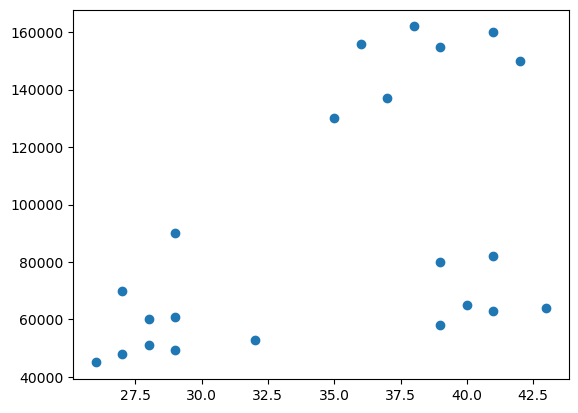

In [14]:
plt.scatter(df['Age'], df['Income($)'])

### Here the clustering is obvious , so we take k=3.

In [15]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [16]:
input = df.drop('Name' ,axis='columns')

In [17]:
y_predicted = km.fit_predict(input)
y_predicted

c:\Users\Anirudh31\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [18]:
df.cluster = y_predicted

C:\Users\Anirudh31\AppData\Local\Temp\ipykernel_18532\3343053480.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cluster = y_predicted


In [19]:
df1 = df[df.cluster== 0]

In [20]:
df2 = df[df.cluster== 1]
df3 = df[df.cluster== 2]

C:\Users\Anirudh31\AppData\Local\Temp\ipykernel_18532\719877465.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


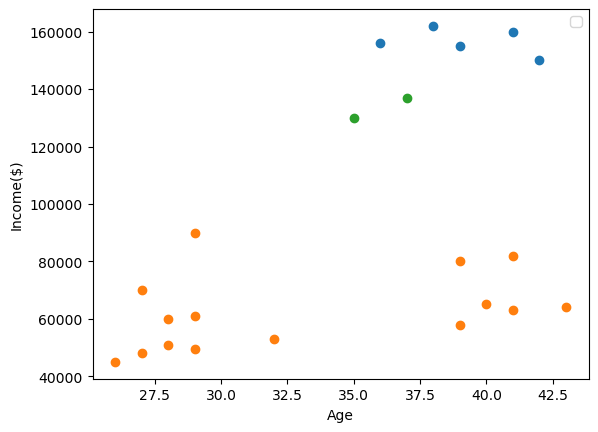

In [21]:
plt.scatter(df1['Age'], df1['Income($)'])
plt.scatter(df2['Age'], df2['Income($)'])
plt.scatter(df3['Age'], df3['Income($)'])

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

### There is some problem with cluster green and Blue. This is because teh y-axis is from 40k to 160k whereas x axis is from near 0 to 43.5 
### X- Axis is more narrower than Y-axis

### TO solve this, we are gonna Preprocess the data with MinMaxScaler module from .preprocess

In [22]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler converts the values between the scale of 0 to 1

there are 2 steps, .fit() and .transform()

In [26]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])

df['Income($)'] = scaler.transform(df[['Income($)']])

In [28]:
scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])

In [29]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [35]:
Km = KMeans(n_clusters=3)

In [37]:
input = df.drop(['Name','cluster'], axis='columns')

In [38]:
y_predicted = km.fit_predict(input)

c:\Users\Anirudh31\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [39]:
df['cluster'] = y_predicted

In [40]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [32]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,2


In [41]:
df1 = df[df.cluster== 0]
df2 = df[df.cluster== 1]
df3 = df[df.cluster== 2]

C:\Users\Anirudh31\AppData\Local\Temp\ipykernel_18532\719877465.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


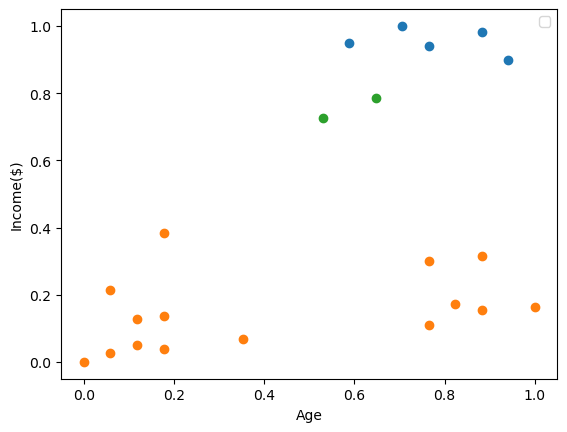

In [42]:
plt.scatter(df1['Age'], df1['Income($)'])
plt.scatter(df2['Age'], df2['Income($)'])
plt.scatter(df3['Age'], df3['Income($)'])

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()